# EndoSign: Data Upload and Quality Control

**WORK IN PROGRESS**

This notebook demonstrates:
- Loading anonymized patient and biomarker data (dummy/example)
- Inspecting the clinical and molecular structure
- Running basic data quality control and exploratory visualization


In [1]:
# Install dependencies if needed (uncomment next line in Colab)
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from endosign.data_loader import load_patient_data  # import from your package when ready

In [3]:
# Path to dummy example data
example_path = "../data/example/dummy_data.csv"

# If not using endosign.data_loader yet:
df = pd.read_csv(example_path)

# If using your package:
# df = load_patient_data(example_path)

print(f"Shape: {df.shape}")
df.head()


Shape: (200, 52)


,Patient_ID,Group,Age,BMI,rASRM_stage,Leiomyoma,Enzian_P,Enzian_O,Enzian_T,Enzian_A,...,Cytokine_27,Cytokine_28,Cytokine_29,Cytokine_30,Cytokine_31,Cytokine_32,Cytokine_33,Cytokine_34,Cytokine_35,Cytokine_36
0,P001,Endometriosis,42,26.1,III,Yes,2,2,3,2,...,6.84,4.42,5.53,5.64,3.66,6.98,4.65,3.49,6.07,3.20
1,P002,Control,38,20.5,NaN,No,0,0,0,0,...,4.57,7.98,5.30,4.33,3.77,4.40,4.22,5.34,5.32,5.01
2,P003,Endometriosis,29,26.4,II,Yes,3,1,1,1,...,4.11,3.23,4.65,8.42,2.26,1.77,7.94,4.58,3.66,7.08
3,P004,Endometriosis,35,26.1,IV,Yes,1,0,2,0,...,6.99,3.49,2.16,8.00,4.35,4.50,7.66,6.11,5.91,9.33
4,P005,Endometriosis,26,21.6,III,Yes,2,0,2,3,...,6.33,7.35,5.36,2.41,5.80,3.70,3.94,6.17,7.48,5.04


In [4]:
# Show data types and missing values
display(df.info())
display(df.isnull().sum())

# Show categorical column unique values
print("Group distribution:\n", df['Group'].value_counts())
print("Leiomyoma distribution:\n", df['Leiomyoma'].value_counts())
print("rASRM stage distribution:\n", df['rASRM_stage'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient_ID     200 non-null    object 
 1   Group          200 non-null    object 
 2   Age            200 non-null    int64  
 3   BMI            200 non-null    float64
 4   rASRM_stage    149 non-null    object 
 5   Leiomyoma      200 non-null    object 
 6   Enzian_P       200 non-null    int64  
 7   Enzian_O       200 non-null    int64  
 8   Enzian_T       200 non-null    int64  
 9   Enzian_A       200 non-null    int64  
 10  Enzian_B       200 non-null    int64  
 11  Enzian_C       200 non-null    int64  
 12  Enzian_Fa      200 non-null    int64  
 13  Enzian_Fu      200 non-null    int64  
 14  Enzian_Fi      200 non-null    int64  
 15  Enzian_Fother  200 non-null    int64  
 16  Cytokine_1     200 non-null    float64
 17  Cytokine_2     200 non-null    float64
 18  Cytokine_3

None

Patient_ID        0
Group             0
Age               0
BMI               0
rASRM_stage      51
Leiomyoma         0
Enzian_P          0
Enzian_O          0
Enzian_T          0
Enzian_A          0
Enzian_B          0
Enzian_C          0
Enzian_Fa         0
Enzian_Fu         0
Enzian_Fi         0
Enzian_Fother     0
Cytokine_1        0
Cytokine_2        0
Cytokine_3        0
Cytokine_4        0
Cytokine_5        0
Cytokine_6        0
Cytokine_7        0
Cytokine_8        0
Cytokine_9        0
Cytokine_10       0
Cytokine_11       0
Cytokine_12       0
Cytokine_13       0
Cytokine_14       0
Cytokine_15       0
Cytokine_16       0
Cytokine_17       0
Cytokine_18       0
Cytokine_19       0
Cytokine_20       0
Cytokine_21       0
Cytokine_22       0
Cytokine_23       0
Cytokine_24       0
Cytokine_25       0
Cytokine_26       0
Cytokine_27       0
Cytokine_28       0
Cytokine_29       0
Cytokine_30       0
Cytokine_31       0
Cytokine_32       0
Cytokine_33       0
Cytokine_34       0


Group distribution:
 Group
Endometriosis    149
Control           51
Name: count, dtype: int64
Leiomyoma distribution:
 Leiomyoma
Yes    144
No      56
Name: count, dtype: int64
rASRM stage distribution:
 rASRM_stage
III    59
II     51
IV     32
I       7
Name: count, dtype: int64


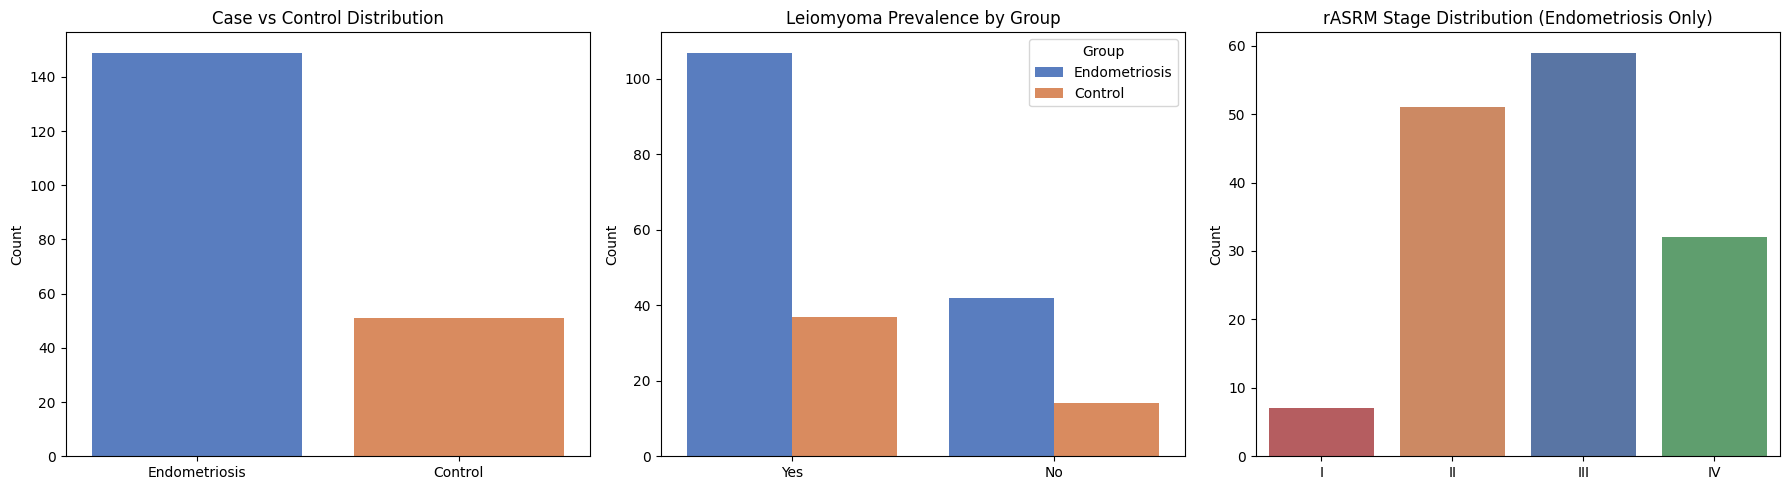

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Case/Control distribution
sns.countplot(x='Group', hue='Group', data=df, ax=axes[0], palette='muted', legend=False)
axes[0].set_title("Case vs Control Distribution")

# Leiomyoma prevalence by group
sns.countplot(x='Leiomyoma', hue='Group', data=df, ax=axes[1], palette='muted')
axes[1].set_title("Leiomyoma Prevalence by Group")

# rASRM stage (excluding controls), ordered I-IV
sns.countplot(
    x='rASRM_stage',
    hue='rASRM_stage',
    data=df[df['Group'] == 'Endometriosis'],
    ax=axes[2],
    palette='deep',
    order=['I', 'II', 'III', 'IV'],
    legend=False
)
axes[2].set_title("rASRM Stage Distribution (Endometriosis Only)")

for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [11]:
enzian_cols = [col for col in df.columns if col.startswith("Enzian_")]

df_endo = df[df['Group'] == 'Endometriosis']

enzian_summary = df_endo[enzian_cols].describe()
display(enzian_summary)


,Enzian_P,Enzian_O,Enzian_T,Enzian_A,Enzian_B,Enzian_C,Enzian_Fa,Enzian_Fu,Enzian_Fi,Enzian_Fother
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,1.409396,1.463087,1.348993,1.449664,1.610738,1.510067,0.516779,0.483221,0.496644,0.516779
std,1.102904,1.081312,1.114561,1.153351,1.125331,1.100476,0.501404,0.501404,0.501675,0.501404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


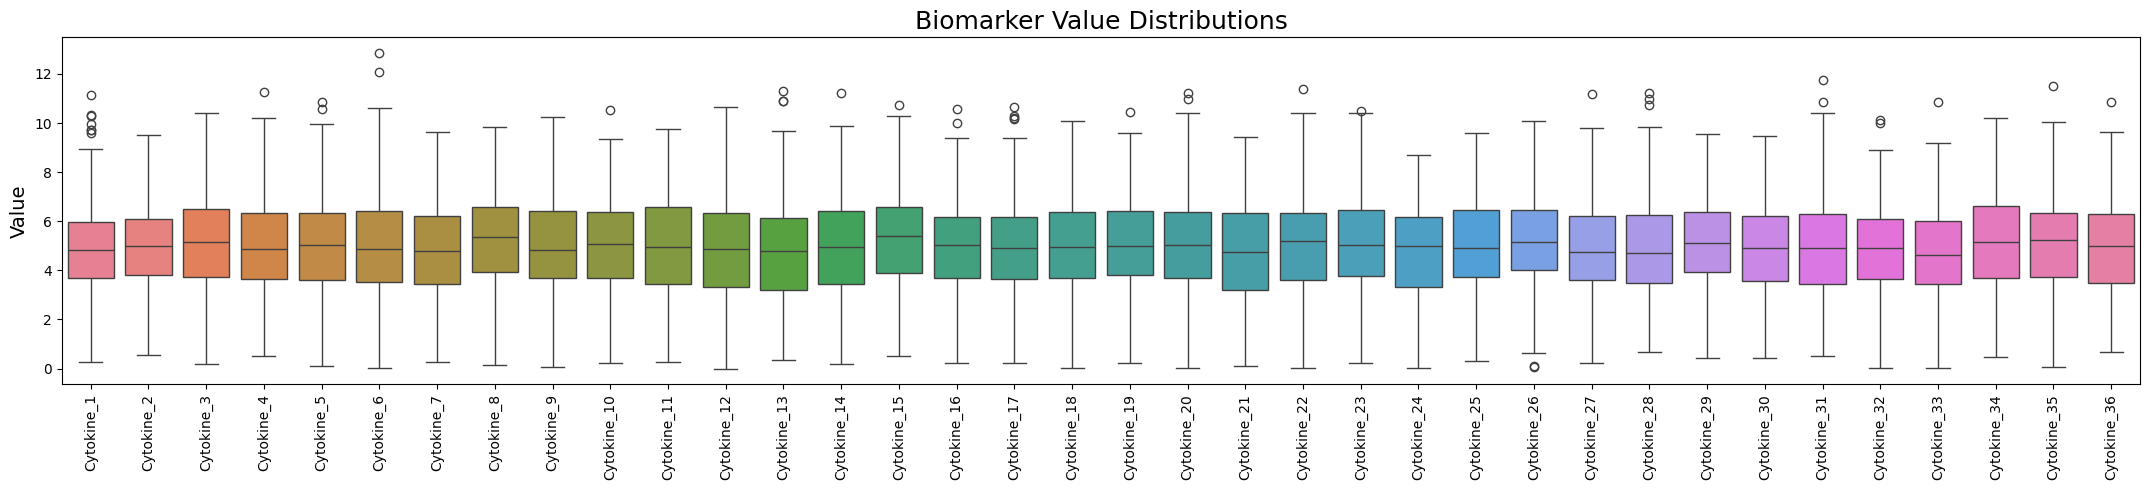

In [23]:
plt.figure(figsize=(max(14, len(biomarker_cols) * 0.6), 5))
sns.boxplot(data=df[biomarker_cols])
plt.title("Biomarker Value Distributions", fontsize=18)
plt.xticks(rotation=90, ha='center')
plt.xlabel("")
plt.ylabel("Value",fontsize=14)
plt.tight_layout()
plt.show()


In [24]:
# Save subset, e.g. for ML workflows
df.to_csv("../data/interim/checked_data.csv", index=False)